In [1]:
import sys
sys.path.append('/Users/steeeve/Documents/csiss/streetview_crop_classification/cropClassification')

In [2]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import torch
import numpy as np
from sam_functions import *
from utils import show_df_img


In [3]:
np.random.seed(42)
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs 
    # (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )
print(bool(os.environ["PYTORCH_ENABLE_MPS_FALLBACK"]))

using device: mps

Support for MPS devices is preliminary. SAM 2 is trained with CUDA and might give numerically different outputs and sometimes degraded performance on MPS. See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion.
True


In [4]:
df_path = "/Users/steeeve/Documents/csiss/data/iowa_nebraska_labeled_imgs_filtered_reclass.json"
model_chkpt = "/Users/steeeve/Documents/csiss/segment-anything-2/checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

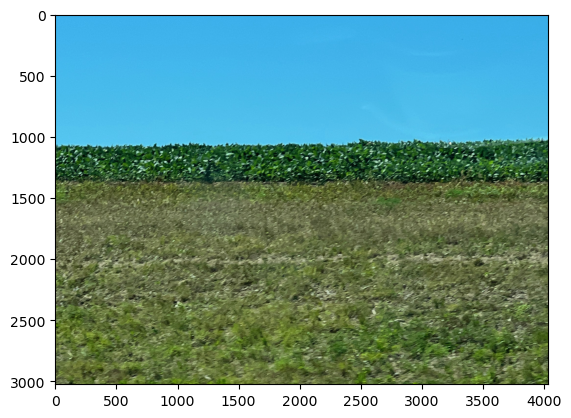

In [5]:
show_df_img(df_path, 10)

/Users/steeeve/miniconda3/envs/SAM2/lib/python3.10/site-packages/torch/nn/functional.py:4095: UserWarning: The operator 'aten::upsample_bicubic2d.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1724788636886/work/aten/src/ATen/mps/MPSFallback.mm:13.)
  return torch._C._nn.upsample_bicubic2d(input, output_size, align_corners, scale_factors)


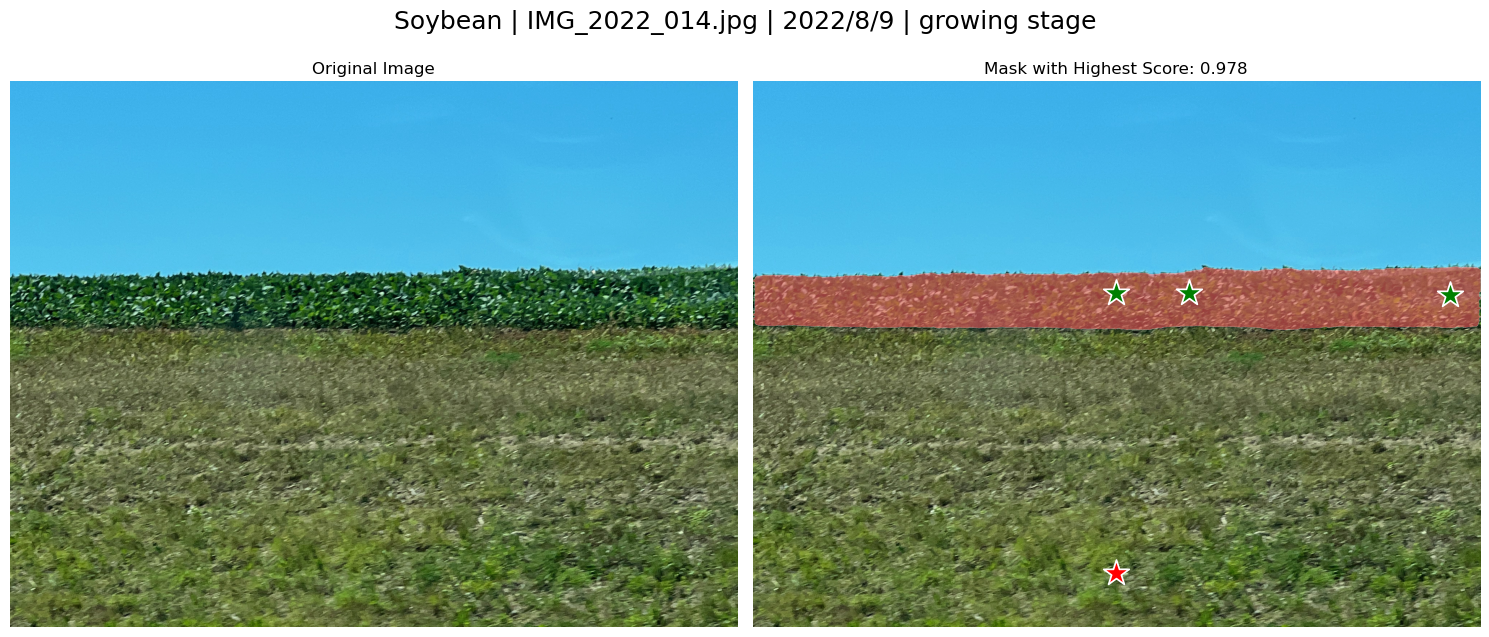

In [6]:
sam2_mask_generate(df_path, 10, [model_chkpt, model_cfg, device])